In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Import data
data_path = r"C:\Users\suhas\Documents\cf\ch6\Data\flavors_of_cacao_cleaned.csv"
df = pd.read_csv(data_path)
#df.head()
# Remove all non-numeric columns 
df = df[["CocoaPercent", "Rating"]]
df.head()


,CocoaPercent,Rating
0,63.0,3.75
1,70.0,2.75
2,70.0,3.00
3,70.0,3.50
4,70.0,3.50


In [3]:
# Elbow Technique
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score for the means
score

[-72137.40229805016,
 -36448.82297639369,
 -28932.42205023153,
 -12609.96664931719,
 -7083.03442830175,
 -5131.091318852928,
 -3711.768532246127,
 -3055.4376790134174,
 -2399.8020479021125]

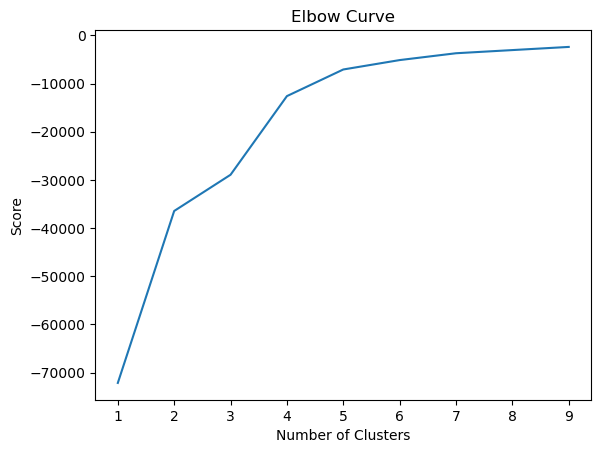

In [4]:
# Plot the curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I chose n = 3 as my clusters since the elbow appears to peak around there. I tried n = 4 but the clusters were quite hard to differentiate, especially the middle ones.

In [5]:
# Create and fit k-means object
kmeans = KMeans(n_clusters = 3) 
kmeans.fit(df)

KMeans(n_clusters=3)

In [6]:
# Show clusters
df['clusters'] = kmeans.fit_predict(df)
df['clusters'].value_counts()

clusters
2    1072
0     479
1     244
Name: count, dtype: int64

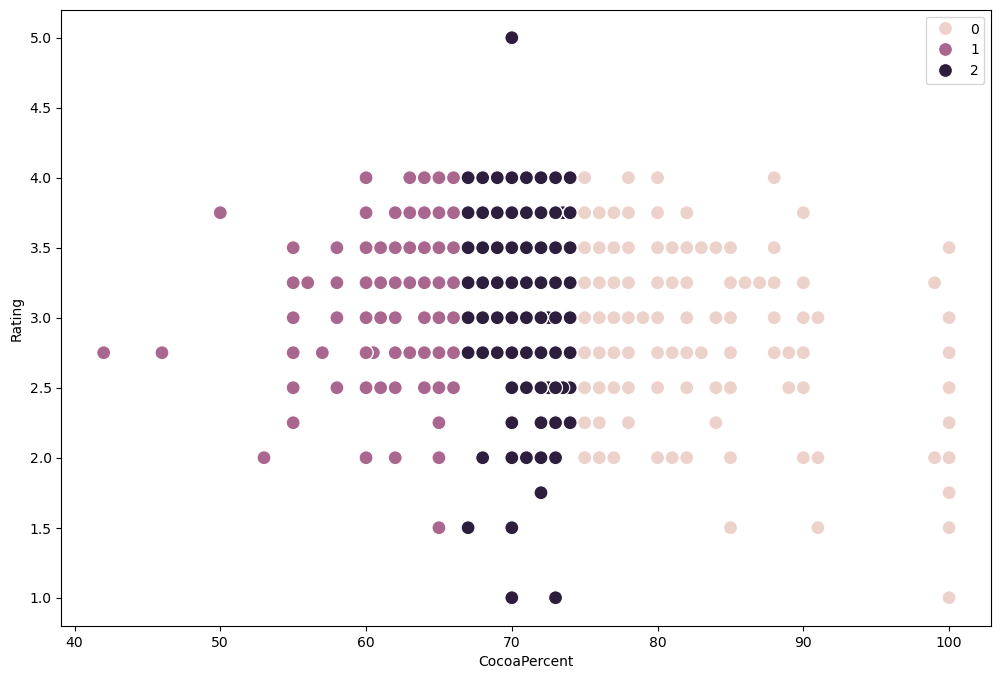

In [7]:
# Plot clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['CocoaPercent'], y=df['Rating'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('CocoaPercent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

The clusters represent 3 groups of varying cocoa percentage, one with low percentage (under 65), one with medium (65-75) and the high percentage (75+). The ratings vary widely and the high cocoa percentage contains the most points in comparison to the other 2 clusters.

In [22]:
# Get labels of each cluster
df.loc[df['clusters'] == 2, 'cluster'] = 'High Percent'
df.loc[df['clusters'] == 1, 'cluster'] = 'Low Percent'
df.loc[df['clusters'] == 0, 'cluster'] = 'Medium Percent'

In [23]:
# Summary Statistics
df.groupby('cluster').agg({'CocoaPercent':['median'], 
                          'Rating':['median']})

,CocoaPercent,Rating
,median,median
cluster,,
High Percent,70.0,3.25
Low Percent,64.0,3.25
Medium Percent,76.0,3.00


I chose not to include the mean here since the data was likely to be skewed towards the extreme. As mentioned earlier, the median values of all 3 percentages suggest that the data as a whole is biased towards higher cocoapercent values as all of the data points are greater than 50%. Ratings also appear to not show any signficant differences minus high and low percent having 1/4 higher median ratings.

This info is valuable as we can begin to classify our chocolate bars into multiple categories that can be used to predict the final rating value of any chocolate bar within the dataset. Additionally, I want to look at the high and low percent to find their relationship towards earning a higher rating or based on their BeanType / Origin.